## MEAM 5170 Final Project Group 17 
Shreya Lanjewar, Nikola Obradovic, Emily Paul

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers, path_planner
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
importlib.reload(path_planner)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment
from controllers import *
from path_planner import TrivialPathPlanner, AStarPathPlanner

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

Q = np.diag([10,10,1,1])
R = [100]
T = 0.01
bot = Acrobot(plant)
env = Environment(-5, 5, -5, 5, 0.15, initial_hold=(2, 0.))
env.generate_single_hold(np.array([0, 0]))
controller = MPCController(bot, Q, R, Q)
# controller = ZeroController(bot)
path_planner = TrivialPathPlanner(env)


simresults = simulate_acrobot(np.array([-3*np.pi/4, np.pi/16, 0, 0]), 10, bot,
                           controller, path_planner)

viz = AcrobotVisualizer(bot, env)
# viz.draw(simresults.x[0,:], simresults.t[0], simresults.origin_offsets[0], 
#          simresults.pose[0], simresults.current_holds[0], simresults.next_holds[0])
ani = create_animation(viz,simresults.x,simresults.t, simresults.origin_offsets, 
                       simresults.pose, simresults.current_holds, simresults.next_holds)
plt.close()
HTML(ani.to_jshtml())

# fig1 = plt.figure(figsize=(4,3))
# plt.plot(t, x[:,0], label='x_0')
# plt.plot(t, x[:,1], label='x_1')
# plt.plot(t, x[:,2], label='x_2')
# plt.plot(t, x[:,3], label='x_3')
# plt.legend()



KeyboardInterrupt: 

In [ ]:
#save sim results as dict so that they can be viewed in DataWrangler
res = simresults._asdict()

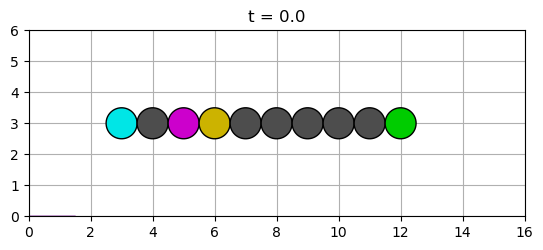

In [154]:
# Test Environment generation
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

env2 = Environment(grasp_radius=0.5)
env2.generate_static_monkey_bars(10,1)
viz2 = AcrobotVisualizer(bot,env2)
viz2.draw(np.array([0,0,0,0]),0,current_hold=2, next_hold=3)

In [ ]:
# Save animation as gif
import matplotlib.animation as animation

f = r"animation.gif" 
writergif = animation.PillowWriter(fps=50) 
ani.save(f, writer=writergif)

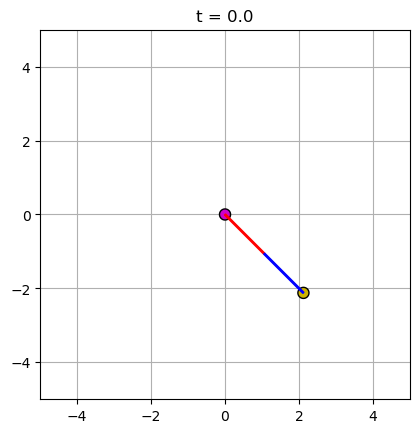

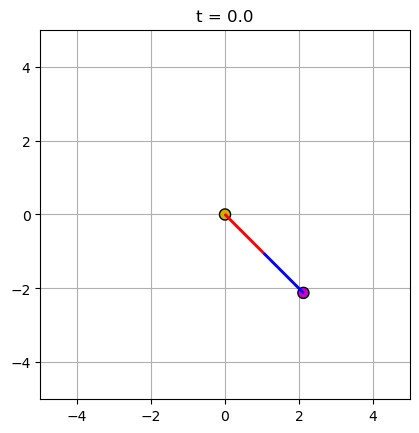

In [127]:
# Test Acrobot reset map: Generated plots should be the same, except for color of holds
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

bot = Acrobot(plant)
env = Environment(-5, 5, -5, 5, 0.15, initial_hold=(0., 0.))
state = np.array([np.pi/4, 0, 0, 0])

env.generate_single_hold(bot.get_tip_position(state))

viz = AcrobotVisualizer(bot, env)
viz.draw(state, 0, (0,0), 
         1, 0, 1)
viz2 = AcrobotVisualizer(bot, env)
viz2.draw(bot.reset_map(state), 0, bot.get_tip_position(state), 
         -1, 1, 0)

for x0 in np.linspace(-np.pi,np.pi,16):
    for x1 in np.linspace(-np.pi,np.pi,16):
        state = np.array([x0, x1, 0, 0])
        re_state = bot.reset_map(bot.reset_map(state))
        diff = np.abs(state - re_state) % (np.pi*2)
        if not all(1e-10 > diff):
            print("State: {}\nrestate: {}\ndiff: {}".format(state, re_state,diff))
            viz.draw(state, 0, (0,0), 
                    1, 0, 1)
            viz2.draw(bot.reset_map(state), 0, bot.get_tip_position(state), 
                    -1, 1, 0)
            
        # print(state - bot.reset_map(bot.reset_map(state)))
        assert all(1e-10 > diff)
        #assert all([x < 1e-10 for x in (bot.get_tip_position(bot.reset_map(state)) + bot.get_tip_position(state))]), "x = {}".format(state)

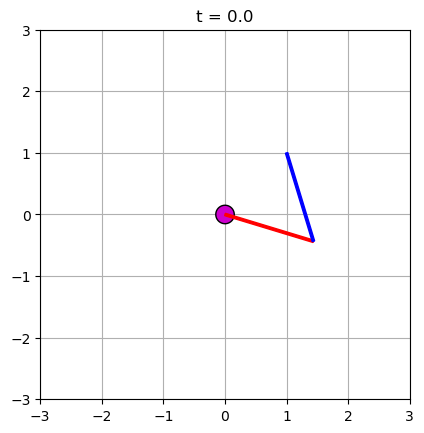

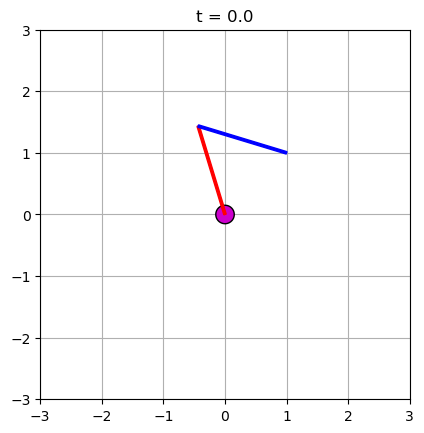

In [157]:
# Test Acrobot forward and inverse kinematics: Generated plots should be the same
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

bot = Acrobot(plant)
env = Environment(-3, 3, -3, 3, 0.15, initial_hold=(0., 0.))

viz = AcrobotVisualizer(bot, env)
viz.draw(np.hstack([bot.get_joint_angles(np.array([1,1]),True),np.zeros(2)]), 0, (0,0), 
            1, 0, 1)    
viz2 = AcrobotVisualizer(bot, env)
viz2.draw(np.hstack([bot.get_joint_angles(np.array([1,1]),False),np.zeros(2)]), 0, (0,0), 
            1, 0, 1)   
    
testcase = 0
x1_positive = False
for x0 in np.linspace(-np.pi,np.pi,16):
    for x1 in np.linspace(-np.pi,np.pi,16):
        state = np.array([x0, x1, 0, 0])
        new_state = np.hstack([bot.get_joint_angles(bot.get_tip_position(state),x1_positive),np.zeros(2)])
        diff = np.abs(state - new_state)
        ee_diff = np.abs(bot.get_tip_position(state) - bot.get_tip_position(new_state))
        if not all(1e-10 > ee_diff):
            print("Case: {}\ntip pos: {}\ncalc tip: {}\nDiff: {}".format(testcase,bot.get_tip_position(state),bot.get_tip_position(new_state),ee_diff))
            viz.draw(state, 0, (0,0), 
            1, 0, 1)
            viz2.draw(np.hstack([bot.get_joint_angles(bot.get_tip_position(state),x1_positive),np.zeros(2)]), 0, (0,0), 
            1, 1, 0)
        testcase += 1   
        # assert all(1e-10 > diff)
        assert all(1e-10 > ee_diff)
       

In [58]:
# Develop continuous_time_linear_dynamics() function
# Linearize around given scalar state/input
# https://stackoverflow.com/a/64565582

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform, MathematicalProgram)
from pydrake.autodiffutils import AutoDiffXd, InitializeAutoDiff, ExtractGradient
from pydrake.systems.framework import BasicVector_
import acrobot, acrobot_sim, visualizer, environment, controllers, manipulator_dynamics
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
importlib.reload(manipulator_dynamics)
from acrobot_sim import simulate_acrobot
from manipulator_dynamics import ManipulatorDynamics



def get_dynamics_gradient(plant_ad, context_ad, input_port, x_val, u_val):
    xu_val = np.hstack((x_val, u_val))
    nx = context_ad.num_continuous_states()
    # Set the gradient (default to identity), namely the gradient field of
    # xu_ad records the gradient w.r.t x and u. All of the  autodiff
    # scalars computed using xu_ad now carry the gradient w.r.t x and u.
    xu_ad = InitializeAutoDiff(xu_val)
    
    x_ad = xu_ad[:nx]
    u_ad = xu_ad[nx:]
    # context_ad.SetContinuousState(x_ad)
    plant_ad.SetPositionsAndVelocities(context_ad, x_ad)
    plant_ad.get_input_port(input_port).FixValue(context_ad, BasicVector_[AutoDiffXd](u_ad))  
    derivatives = plant_ad.AllocateTimeDerivatives()
    plant_ad.CalcTimeDerivatives(context_ad, derivatives)
    xdot_ad = derivatives.get_vector().CopyToVector()    

    AB = ExtractGradient(xdot_ad)

    A = AB[:, :nx]
    B = AB[:, nx:]
    return A, B

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()
plant_autodiff = plant.ToAutoDiffXd()
context_ad = plant_autodiff.CreateDefaultContext()
x = np.array([1., 2., 0., 0.])
u = np.array([0.])
# I don't know the name of the input port, please adjust this name
# based on your parsed plant.


for input_port in range(plant_autodiff.num_input_ports()):
    print(f"input port {input_port} name is {plant_autodiff.get_input_port(input_port).get_name()}")
input_port = plant_autodiff.get_actuation_input_port().get_index()
f_x, f_u = get_dynamics_gradient(plant_autodiff, context_ad, input_port, x, u)

print(f_x)
print(f_u)

input port 0 name is geometry_query
input port 1 name is WorldModelInstance_actuation
input port 2 name is DefaultModelInstance_actuation
input port 3 name is acrobot_actuation
input port 4 name is actuation
input port 5 name is WorldModelInstance_desired_state
input port 6 name is DefaultModelInstance_desired_state
input port 7 name is acrobot_desired_state
input port 8 name is applied_generalized_force
input port 9 name is applied_spatial_force
[[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-2.72568802 -2.188186   -0.03691894  0.01389273]
 [10.72936166  0.85642882  0.01389273 -0.13844931]]
[[ 0.        ]
 [ 0.        ]
 [-0.13892731]
 [ 1.38449313]]


In [ ]:
# Develop time_varying_linear_dynamics() function
# Linearize around Variable state/input (is this even possible?)
# https://stackoverflow.com/a/64565582

# Ref: https://stackoverflow.com/questions/77687354/substitute-symbolic-variables-with-autodiff-variables

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform, MathematicalProgram)
from pydrake.autodiffutils import AutoDiffXd, InitializeAutoDiff, ExtractGradient
from pydrake.systems.framework import BasicVector_
import acrobot, acrobot_sim, visualizer, environment, controllers, manipulator_dynamics
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
importlib.reload(manipulator_dynamics)
from acrobot_sim import simulate_acrobot
from manipulator_dynamics import ManipulatorDynamics



def get_dynamics_gradient(plant_ad, context_ad, input_port, x_val, u_val):
    xu_val = np.hstack((x_val, u_val))
    nx = context_ad.num_continuous_states()
    # Set the gradient (default to identity), namely the gradient field of
    # xu_ad records the gradient w.r.t x and u. All of the  autodiff
    # scalars computed using xu_ad now carry the gradient w.r.t x and u.
    # xu_ad = InitializeAutoDiff(xu_val)
    xu_ad = xu_val
    x_ad = xu_ad[:nx]
    u_ad = xu_ad[nx:]
    # context_ad.SetContinuousState(x_ad)
    plant_sym = plant_ad.ToSymbolic()
    context_sym = plant_sym.CreateDefaultContext()
    plant_sym.SetPositionsAndVelocities(context_sym, x_ad)
    # plant_sym.get_input_port(input_port).FixValue(context_sym, BasicVector_[AutoDiffXd](u_ad))  
    derivatives = plant_sym.AllocateTimeDerivatives()
    plant_sym.CalcTimeDerivatives(context_sym, derivatives)
    xdot_ad = derivatives.get_vector().CopyToVector()    

    AB = ExtractGradient(xdot_ad)

    A = AB[:, :nx]
    B = AB[:, nx:]
    return A, B

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()
plant_autodiff = plant.ToAutoDiffXd()
context_ad = plant_autodiff.CreateDefaultContext()

# Create decision variables
N = 10
T = 0.1
prog = MathematicalProgram()
x = np.zeros((N, 4), dtype="object")
for i in range(N):
    x[i] = prog.NewContinuousVariables(4, "x_" + str(i))
u = np.zeros((N-1, 1), dtype="object")
for i in range(N-1):
    u[i] = prog.NewContinuousVariables(1, "u_" + str(i))

input_port = plant_autodiff.get_actuation_input_port().get_index()
f_x, f_u = get_dynamics_gradient(plant_autodiff, context_ad, input_port, x[0], u[0])
print(f_x)
print(f_u)

In [ ]:
#need these lines when we use linear dynamics (linearization needs x_dot at point of linearization)
# f_xdud = self.continuous_time_full_dynamics(xd, ud)
# f_xdud + A @ (x-xd) + B @ (u-ud)

In [ ]:
# Generate nice-looking plot of arm and environment
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

bot = Acrobot(plant)
env = Environment(-4, 8, -4, 4, 0.15, initial_hold=(-1.5, 0.))
state = np.array([np.pi/4, np.pi/8, 0, 0])

env.generate_single_hold(np.array([1,0]))
env.generate_single_hold(np.array([2.5,1]))
env.generate_single_hold(np.array([5,0.5]))
env.generate_single_hold(np.array([6.5,2]))

viz = AcrobotVisualizer(bot, env)
current_hold = 1
viz.draw(state, 0, env.holds[current_hold].position, 
         -1, current_hold, current_hold+1)
viz.ax.set_title("t = {:.1f}".format(8.5))
viz.fig.savefig('acrobot_example.png')